In [1]:
%load_ext lab_black
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mne
import os

# Read data

- we're using mne library to first read data

In [3]:
from mne.io import read_raw_eeglab

In [ ]:
input_fname = "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur1_post1_RELAX.set"
eog = ()

sample_data = read_raw_eeglab(
    input_fname=input_fname, eog=eog, preload=True, montage_units="mm", verbose=True
)

In [66]:
sample_data

array([0.00000e+00, 2.00000e-03, 4.00000e-03, ..., 1.01994e+02,
       1.01996e+02, 1.01998e+02])

# Visual data information

- first, observing time components of signals
- plot psd plot of signal and see frequency component of it

In [ ]:
from mne.viz import plot_raw, plot_raw_psd

In [ ]:
events = None
duration = 1 * 60 + 42  # 1 minute and 42 seconds
n_channels = 20
scalings = None
plot_raw(
    raw=sample_data,
    events=events,
    duration=duration,
    n_channels=n_channels,
    scalings=scalings,
    show=True,
)

print()

In [ ]:
fmin = 0
fmax = np.inf
tmin = None
tmax = None
proj = False  # whether to apply SSP projection vectors
n_fft = None  # number of points to use in Welch FFT calculations
n_overlap = 0  # number of points of overlap between blocks
xscale = "linear"  # scaling of the x-axis (‘linear’ or ‘log’)
area_mode = "std"  # mode for plotting area (‘std’ or ‘range’)
dB = True
estimate = "power"
n_jobs = -1
average = True
sphere = "auto"

plot_raw_psd(
    raw=sample_data,
    fmin=fmin,
    fmax=fmax,
    tmin=tmin,
    tmax=tmax,
    proj=proj,
    n_fft=n_fft,
    n_overlap=n_overlap,
    xscale=xscale,
    area_mode=area_mode,
    dB=dB,
    estimate=estimate,
    n_jobs=n_jobs,
    average=average,
    sphere=sphere,
    show=True,
)

print()

# Handling whole data

- Load all pre, break, and post data to analyze them in these 3 groups

In [4]:
input_fnames = {
    "pre": [
        "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur1_pre1_RELAX.set",
        "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur2_pre2_RELAX.set",
        "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur3_pre3_RELAX.set",
    ],
    "break": [
        "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur2_RELAX.set",
        "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur3_RELAX.set",
    ],
    "post": [
        "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur1_post1_RELAX.set",
        "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur2_post2_RELAX.set",
        "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur3_post3_RELAX.set",
        "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/data/HD_5min40Hz_dur3_post3_part2_RELAX.set",
    ],
}

In [5]:
def extract_metadata(raw, stage: str = "pre"):
    metadata = {
        "stage": stage,
        "filename": os.path.basename(raw.filenames[0]),
        "n_channels": len(raw.info["ch_names"]),
        "duration": raw.times[-1],  # in seconds
        "sample_rate": raw.info["sfreq"],
    }
    return metadata


def get_data(input_fnames, stage: str = "pre", eog=(), verbose=True):
    data = {"data": [], "metadata": []}
    for input_fname in input_fnames:
        raw = read_raw_eeglab(
            input_fname=input_fname,
            eog=eog,
            preload=True,
            montage_units="mm",
            verbose=verbose,
        )
        meta = extract_metadata(raw, stage=stage)
        data["metadata"].append(meta)
        data["data"].append(raw)

    return data


verbose = 0

pre_data = get_data(input_fnames["pre"], stage="pre", verbose=verbose)
break_data = get_data(input_fnames["break"], stage="break", verbose=verbose)
post_data = get_data(input_fnames["post"], stage="post", verbose=verbose)

/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_74588/380193257.py:15: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (the default is "mm", but your channel positions may be in different units).
  raw = read_raw_eeglab(
/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_74588/380193257.py:15: RuntimeWarning: Limited 2 annotation(s) that were expanding outside the data range.
  raw = read_raw_eeglab(
/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_74588/380193257.py:15: RuntimeWarning: The data contains 'boundary' events, indicating data discontinuities. Be cautious of filtering and epoching around these events.
  raw = read_raw_eeglab(
/var/folders/r3/bw3cwm6125lcm5h39987hgz80000gn/T/ipykernel_74588/380193257.py:15: RuntimeWarning: Estimated head radius (0.0 cm) is below the 3rd percentile for infant head size. Check if the montage_units argument is correct (th

In [40]:
columns = ["stage", "filename", "n_channels", "duration", "sample_rate"]

pre_df = pd.DataFrame(pre_data["metadata"], columns=columns)
break_df = pd.DataFrame(break_data["metadata"], columns=columns)
post_df = pd.DataFrame(post_data["metadata"], columns=columns)

df = pd.concat([pre_df, break_df, post_df], axis=0)
# df.to_csv("results/metadata.csv", index=False)
df

,stage,filename,n_channels,duration,sample_rate
0,pre,HD_5min40Hz_dur1_pre1_RELAX.fdt,58,141.498,500.0
1,pre,HD_5min40Hz_dur2_pre2_RELAX.fdt,58,120.998,500.0
2,pre,HD_5min40Hz_dur3_pre3_RELAX.fdt,58,91.998,500.0
0,break,HD_5min40Hz_dur2_RELAX.fdt,58,279.498,500.0
1,break,HD_5min40Hz_dur3_RELAX.fdt,58,287.998,500.0
0,post,HD_5min40Hz_dur1_post1_RELAX.fdt,58,101.998,500.0
1,post,HD_5min40Hz_dur2_post2_RELAX.fdt,58,158.498,500.0
2,post,HD_5min40Hz_dur3_post3_RELAX.fdt,56,113.498,500.0
3,post,HD_5min40Hz_dur3_post3_part2_RELAX.fdt,58,93.998,500.0


Effective window size : 4.096 (s)
Effective window size : 4.096 (s)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.


Effective window size : 4.096 (s)


[Parallel(n_jobs=-1)]: Done   5 out of  16 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  16 | elapsed:    0.0s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   9 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  13 out of  16 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:    0.1s finished


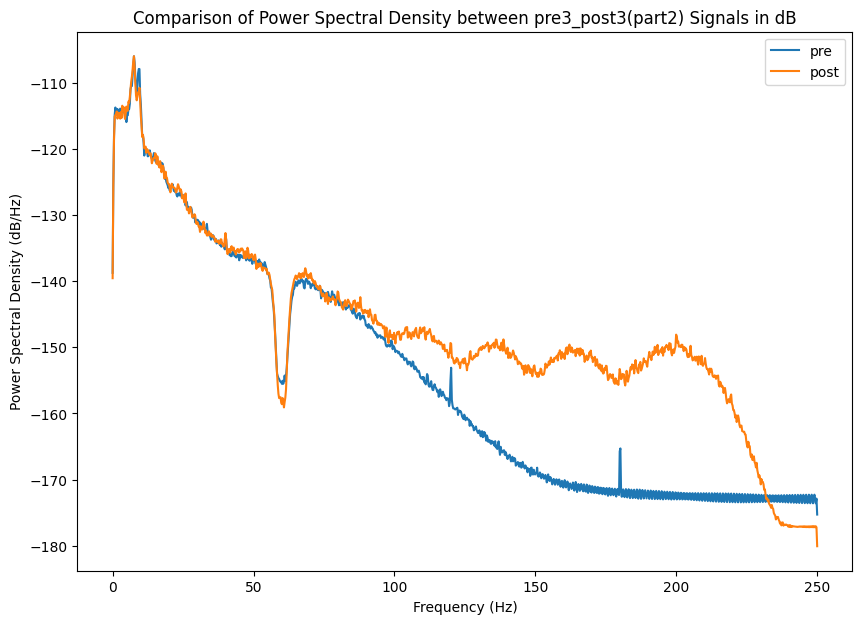

In [39]:
method = "welch"
fmin, fmax = 0, np.inf
tmin, tmax = None, None
remove_dc = False
n_jobs = -1


pre_spectrum = pre_data["data"][2].compute_psd(
    method=method,
    fmin=fmin,
    fmax=fmax,
    tmin=tmin,
    tmax=tmax,
    remove_dc=remove_dc,
    n_jobs=n_jobs,
    n_fft=2048,
)

break_spectrum = break_data["data"][1].compute_psd(
    method=method,
    fmin=fmin,
    fmax=fmax,
    tmin=tmin,
    tmax=tmax,
    remove_dc=remove_dc,
    n_jobs=n_jobs,
    n_fft=2048,
)

post_spectrum = post_data["data"][3].compute_psd(
    method=method,
    fmin=fmin,
    fmax=fmax,
    tmin=tmin,
    tmax=tmax,
    remove_dc=remove_dc,
    n_jobs=n_jobs,
    n_fft=2048,
)

pre_psd, pre_freqs = pre_spectrum.get_data(return_freqs=True)
break_psd, break_freqs = break_spectrum.get_data(return_freqs=True)
post_psd, post_freqs = post_spectrum.get_data(return_freqs=True)


# Average over channels and convert to dB
pre_psd_dB = 10 * np.log10(pre_psd.mean(axis=0))
break_psd_dB = 10 * np.log10(break_psd.mean(axis=0))
post_psd_dB = 10 * np.log10(post_psd.mean(axis=0))


# Plotting
title = "pre3_post3(part2)"
plt.figure(figsize=(10, 7))
plt.plot(pre_freqs, pre_psd_dB, label="pre")
# plt.plot(break_freqs, break_psd_dB, label="break")
plt.plot(post_freqs, post_psd_dB, label="post")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power Spectral Density (dB/Hz)")
plt.title(f"Comparison of Power Spectral Density between {title} Signals in dB")
plt.legend()
plt.savefig(f"../output_data/psd_of_trials/{title}.png", dpi=300)
plt.show()

# Rejected experiments

In [82]:
# concatenate the data is wrong for our case, because concatenation
# function only works if the data need to be continuously.

preload = True
on_mismatch = "ignore"

# pre_raws = mne.concatenate_raws(
#     pre_data["data"], preload=preload, on_mismatch=on_mismatch
# )
# break_raws = mne.concatenate_raws(
#     break_data["data"], preload=preload, on_mismatch=on_mismatch
# )
# TODO: fix the error below: HD_5min40Hz_dur3_post3_RELAX.fdt has 56 channels but the others have 58 channels
# post_raws = mne.concatenate_raws(post_data, preload=preload, on_mismatch=on_mismatch)

# Save the raws
# pre_raws.save(
#     "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/output_data/io_experiments/pre_whole_raws.fif"
# )
# break_raws.save(
#     "/Users/soroush/Documents/Code/freelance-project/vielight/vielight_close_loop/output_data/io_experiments/break_whole_raws.fif"
# )